<!-- # Curvas de calibración - AAS -->

# Curvas AAS

In [43]:
using DataFrames, GLM, Plots, XLSX, DataFrames

## Calcio

In [44]:
dfC = DataFrame(
    conc = [0.5, 1, 2, 3, 6, 8, 10], 
    abs_pro = [0.031, 0.057, 0.108, 0.208, 0.300, 0.384, 0.476], 
    sd = [0.000, 0.000, 0.001, 0.003, 0.000, 0.000, 0.003], 
    rsd = [0.590, 0.800, 1.030, 1.510, 0.000, 0.030, 0.650]
)

Row,conc,abs_pro,sd,rsd
,Float64,Float64,Float64,Float64
1,0.5,0.031,0.0,0.59
2,1.0,0.057,0.0,0.8
3,2.0,0.108,0.001,1.03
4,3.0,0.208,0.003,1.51
5,6.0,0.3,0.0,0.0
6,8.0,0.384,0.0,0.03
7,10.0,0.476,0.003,0.65


In [45]:
dfC_= vcat(dfC[3:3, :], dfC[5:end, :]);

In [46]:
dfC_m = DataFrame(
    conc = [7.674, 7.264, 7.974], 
    abs_pro = [0.3722, 0.3539, 0.3855], 
    sd = [0.08, 0.062, 0.064], 
    rsd = [1.05, 0.85, 0.8]
);

Ecuación de la recta: y = 0.0459 * x + 0.0187 
Valor de R²: 0.9994


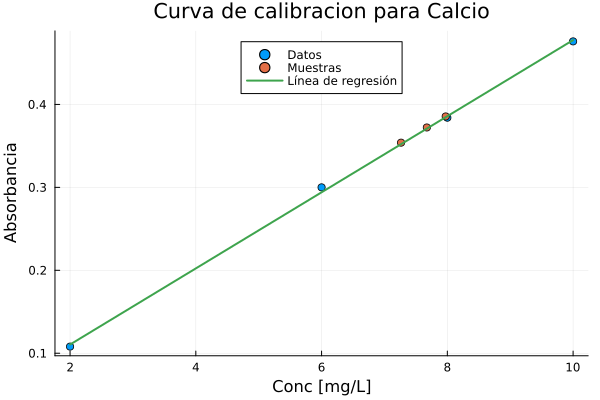

In [47]:
modelo = lm(@formula(abs_pro ~ conc), dfC_)
coefs = coef(modelo)
bC = coefs[1]
mC = coefs[2]
r_squared = r2(modelo)
println("Ecuación de la recta: y = $(round(mC, digits=4)) * x + $(round(bC, digits=4)) ")
println("Valor de R²: $(round(r_squared, digits=4))")
scatter(dfC_.conc, dfC_.abs_pro, label="Datos", xlabel="Conc [mg/L]", ylabel="Absorbancia", legend=:top, title="Curva de calibracion para Calcio")
scatter!(dfC_m.conc, dfC_m.abs_pro, label="Muestras")
plot!(dfC_.conc, predict(modelo), label="Línea de regresión", lw=2)

In [69]:
dfC_m.cc=(dfC_m.abs_pro.-bC)./mC;
dfC_m

Row,conc,abs_pro,sd,rsd,cc
,Float64,Float64,Float64,Float64,Float64
1,7.674,0.3722,0.08,1.05,7.70299
2,7.264,0.3539,0.062,0.85,7.30417
3,7.974,0.3855,0.064,0.8,7.99284


In [74]:

dfC_m.cc

3-element Vector{Float64}:
 7.702988792029888
 7.304171855541719
 7.992839352428395

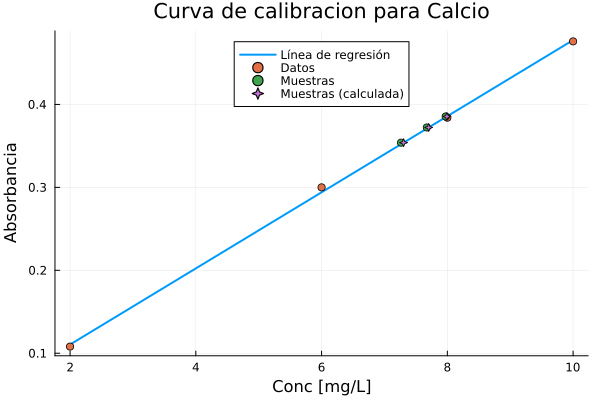

In [49]:
plot(dfC_.conc, predict(modelo), label="Línea de regresión", lw=2, title="Curva de calibracion para Calcio")
scatter!(dfC_.conc, dfC_.abs_pro, label="Datos", xlabel="Conc [mg/L]", ylabel="Absorbancia", legend=:top)
scatter!(dfC_m.conc, dfC_m.abs_pro, label="Muestras")
scatter!(dfC_m.cc, dfC_m.abs_pro, label="Muestras (calculada)", m=:star4)

## Porcentajes de recuperación

Recuperacion del MCL
- Concentracion real de 5
- Concentracion del instrumento antes de mis muestras 4.712
- Concentracion real representa una recupercion del 100%
- % recuperacion del instrumento ?

In [50]:
pr_mclC = (100*4.712)/5

94.24

Recuperacion de muestra forticada
- $\text{C}_1$ = 100 mg/L (Concentracion de Ca en el QCS26)
- $\text{V}_1$ = 0.250 ml (Volumen agregado)
- $\text{C}_2$ = X?
- $\text{V}_2$ = 60 ml (Volumen aforado aprox)

$\text{C}_1=\frac{\text{C}_1\text{V}_2}{\text{V}_1}$

In [51]:
c1 = 100
v1 = 0.250
v2 = 60
c2 = round((c1*v1)/v2, digits=4)

0.4167

A la muestra duplicada le restamos la concentracion de la muestra fortificada, para saber nuestra concentracion 3(?)

In [52]:
rec_fC = round(dfC_m.conc[end]-dfC_m.conc[1], digits=4)

0.3

In [53]:
dfC_m

Row,conc,abs_pro,sd,rsd,cc
,Float64,Float64,Float64,Float64,Float64
1,7.674,0.3722,0.08,1.05,7.70299
2,7.264,0.3539,0.062,0.85,7.30417
3,7.974,0.3855,0.064,0.8,7.99284


Conociendo las concentraciones, podemos obtener el % de recuperacion

In [54]:
pr_mfC = (100*rec_fC)/c2

71.99424046076314

## Magnesio

In [55]:
dfM = DataFrame(
    conc = [0.5, 1, 2, 6, 12, 18, 25],
    abs_pro = [0.019, 0.031, 0.049, 0.115, 0.198, 0.292, 0.415],
    sd = [0.006, 0.007, 0.009, 0.007,  0.009, 0.005, 0.018],
    rsd = [29.97, 22.76, 18.03, 6.07, 4.38, 1.72, 4.27]
)

Row,conc,abs_pro,sd,rsd
,Float64,Float64,Float64,Float64
1,0.5,0.019,0.006,29.97
2,1.0,0.031,0.007,22.76
3,2.0,0.049,0.009,18.03
4,6.0,0.115,0.007,6.07
5,12.0,0.198,0.009,4.38
6,18.0,0.292,0.005,1.72
7,25.0,0.415,0.018,4.27


In [56]:
dfM_= vcat(dfM[1:3, :], dfM[5:end-1, :]);
# dfM_ = dfM

In [57]:
dfM_m = DataFrame(
    conc = [4.075, 3.281, 3.324], 
    abs_pro = [0.085, 0.072, 0.073], 
    sd = [0.238, 0.293, 0.005], 
    rsd = [5.83, 8.93, 0.14]
);

Ecuación de la recta: y = 0.0154 * x + 0.0148 
Valor de R²: 0.9995


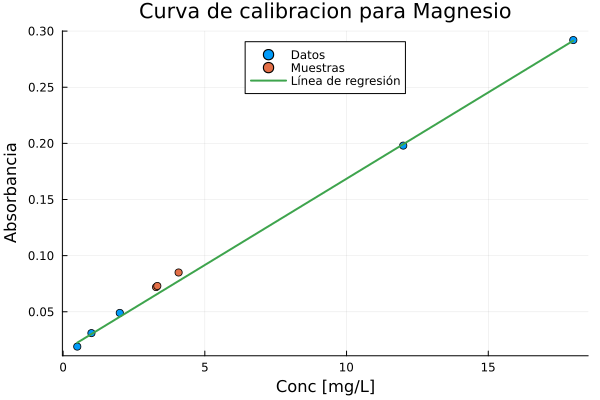

In [58]:
modelo = lm(@formula(abs_pro ~ conc), dfM_)
coefs = coef(modelo)
bM = coefs[1]
mM = coefs[2]
r_squared = r2(modelo)
println("Ecuación de la recta: y = $(round(mM, digits=4)) * x + $(round(bM, digits=4)) ")
println("Valor de R²: $(round(r_squared, digits=4))")
scatter(dfM_.conc, dfM_.abs_pro, label="Datos", xlabel="Conc [mg/L]", ylabel="Absorbancia", legend=:top, title="Curva de calibracion para Magnesio")
scatter!(dfM_m.conc, dfM_m.abs_pro, label="Muestras")
plot!(dfM_.conc, predict(modelo), label="Línea de regresión", lw=2)

In [79]:
dfM_m.cc=(dfM_m.abs_pro.-bM)./mM;
dfM_m.cc

3-element Vector{Float64}:
 4.566053030699232
 3.720281366037341
 3.785340724857486

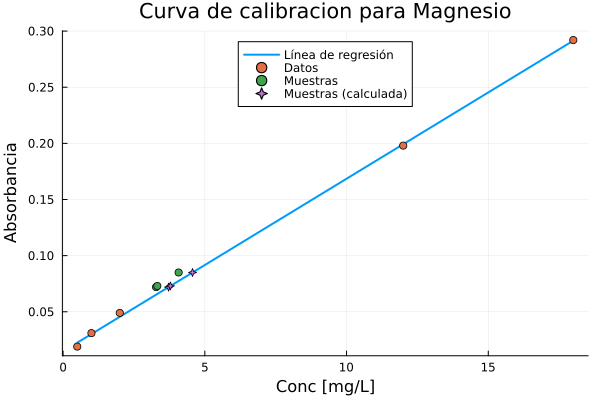

In [60]:
plot(dfM_.conc, predict(modelo), label="Línea de regresión", lw=2, title="Curva de calibracion para Magnesio")
scatter!(dfM_.conc, dfM_.abs_pro, label="Datos", xlabel="Conc [mg/L]", ylabel="Absorbancia", legend=:top)
scatter!(dfM_m.conc, dfM_m.abs_pro, label="Muestras")
scatter!(dfM_m.cc, dfM_m.abs_pro, label="Muestras (calculada)", m=:star4)

In [61]:
pr_mclM = (100*9.076)/9

100.84444444444445

In [62]:
c1 = 100
v1 = 0.250
v2 = 60
c2 = round((c1*v1)/v2, digits=4)

0.4167

A la muestra duplicada le restamos la concentracion de la muestra fortificada, para saber nuestra concentracion 3(?)

In [63]:
dfM_m

Row,conc,abs_pro,sd,rsd,cc
,Float64,Float64,Float64,Float64,Float64
1,4.075,0.085,0.238,5.83,4.56605
2,3.281,0.072,0.293,8.93,3.72028
3,3.324,0.073,0.005,0.14,3.78534


In [64]:
rec_fM = round(dfM_m.conc[end]-dfM_m.conc[end-1], digits=4)

0.043

In [65]:
pr_mfM = (100*rec_fM)/c2

10.319174466042716

# Curvas ICP

Recuperacion del MCL
- Concentracion real de 5
- Concentracion del instrumento antes de mis muestras 4.712
- Concentracion real representa una recupercion del 100%
- % recuperacion del instrumento ?

In [66]:
xf = XLSX.readdata("ICP-OES_EPA200.7-Mayores_CETAC_240912.xlsx", "Std-MCL-Conc", "A1:B27")
mcl1 = DataFrame(
    "MCL1 EPA 200.7" => xf[2:end,1],
    "Concentracion Real[mg/L]" => xf[2:end,2] 
);
xf = XLSX.readdata("ICP-OES_EPA200.7-Mayores_CETAC_240912.xlsx", "Std-MCL-Conc", "A29:B32")
mcl2 = DataFrame(
    "MCL2 QCS26" => xf[2:end,1],
    "Concentracion Real[mg/L]" => xf[2:end,2] 
);
xf = XLSX.readdata("ICP-OES_EPA200.7-Mayores_CETAC_240912.xlsx", "Std-MCL-Conc", "A34:B40")
mcl3 = DataFrame(
    "MCL 3 Mayores" => xf[2:end,1],
    "Concentracion Real[mg/L]" => xf[2:end,2] 
);

In [67]:
# Curva
qcc = DataFrame(XLSX.readdata("ICP-OES_EPA200.7-Mayores_CETAC_240912.xlsx", "Curva-QC!A1:BQ45"), :auto);